# Exercise 6

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
heart_disease = pd.read_csv('Heart_disease_cleveland_new.csv')

# Extract the features and the target
X_heart = heart_disease.drop('target', axis=1)
y_heart = heart_disease['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_heart, list(y_heart), test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.transform(X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,-0.198627,1,2,-0.125982,0.007893,1,2,1.021242,0,-0.873573,0,3,1
228,-0.088632,1,3,-1.226617,-0.822617,0,2,-1.877375,1,-0.873573,1,1,1
111,0.131357,1,3,-0.401140,0.070182,1,2,-0.271987,1,0.138740,1,1,1
246,0.351347,1,3,-1.776934,-0.241260,0,0,0.263142,0,-0.789214,0,1,3
60,-0.418617,0,3,-0.125982,1.232896,0,0,-0.361175,1,0.138740,1,0,3


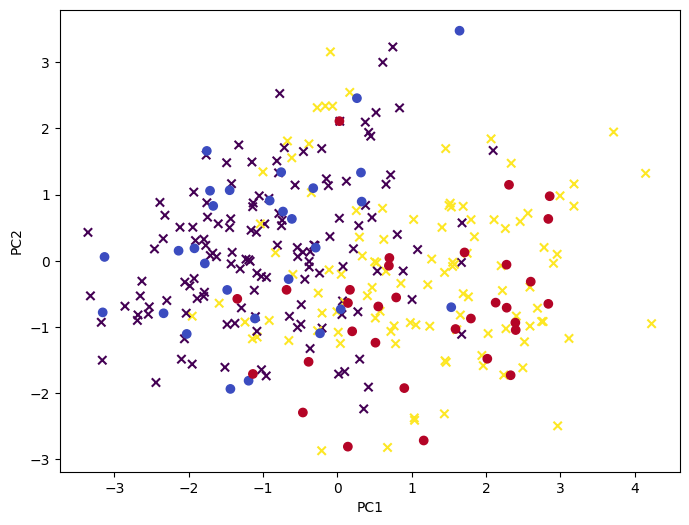

In [4]:
# Apply PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Plot the first two principal components od train and test sets. Also add legend of the target values (heart diesase or not)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='x')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='o')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Goal: Classify heart disease

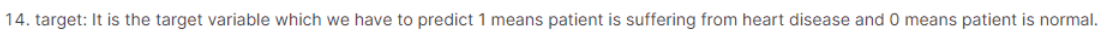

In [5]:
def knn_func(X_train, y_train, X_test, k):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            distance = np.sqrt(np.sum(np.square(X_test[i] - X_train[j])))
            distances.append([distance, j])
        distances.sort()
        targets = []

        for j in range(k):
            index = distances[j][1]
            targets.append(y_train[index])
        y_pred.append(max(set(targets), key=targets.count))
    return y_pred


def accuracy(y_test, y_pred):
    correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            correct += 1
    return correct / len(y_test)

In [6]:
# Predict the target values
y_pred = knn_func(X_train, y_train, X_test, 5)

# Calculate the accuracy of the model
print('Accuracy of the model: ', accuracy(y_test, y_pred))

Accuracy of the model:  0.8852459016393442


## Distance metrics

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Define the k-NN function
def knn(X_train, y_train, X_test, k, metric):
    classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    return y_pred



### L1 norm 
$L_1 = \sum_{i=1}^{n} |x_i - y_i|$

In [8]:
def L1_norm(x1, x2):
    return np.sum(np.abs(x1 - x2))

### L2 norm 
$L_1 = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$

In [9]:
def L2_norm(x1, x2):
    return np.sqrt(np.sum(np.square(x1 - x2)))

### Lp norm with p = 3
$L_p(x_1, x_2) = \sqrt[p]{\sum_{i=1}^{n} |x_{1i} - x_{2i}|^p}$

In [10]:
def L3_norm(x1, x2):
    return np.power(np.sum(np.power(np.abs(x1 - x2), 3)), 1/3)

# Chebyshev (L∞ norm)
$L_{\infty}(x, y) = \max_{i} |x_i - y_i|$

In [11]:
def chebyshev(x1, x2):
    return np.max(np.abs(x1 - x2))

#  Cosine similarity
$\cos \varphi (x, y) = \frac{\sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} x_i^2}\sqrt{\sum_{i=1}^{n} y_i^2}}$

In [12]:
def cosine_similarity(x1, x2):
    return np.dot(x1, x2) / (np.sqrt(np.dot(x1, x1)) * np.sqrt(np.dot(x2, x2)))

In [13]:
y_pred = knn(X_train, y_train, X_test, 5, L1_norm)
print('Accuracy:', accuracy(y_test, y_pred))

Accuracy: 0.8032786885245902


In [14]:
y_pred = knn(X_train, y_train, X_test, 5, L2_norm)
print('Accuracy:', accuracy(y_test, y_pred))

Accuracy: 0.8852459016393442


In [15]:
y_pred = knn(X_train, y_train, X_test, 5, L3_norm)
print('Accuracy:', accuracy(y_test, y_pred))

Accuracy: 0.9016393442622951


In [16]:
y_pred = knn(X_train, y_train, X_test, 5, chebyshev)
print('Accuracy:', accuracy(y_test, y_pred))

Accuracy: 0.9016393442622951


In [17]:
y_pred = knn(X_train, y_train, X_test, 5, cosine_similarity)
print('Accuracy:', accuracy(y_test, y_pred))

Accuracy: 0.3442622950819672


### We can plot a grid showing how kNN would decide

In [18]:
metrics = {'L1_norm': L1_norm, 'L2_norm': L2_norm, 'L3_norm': L3_norm, 'chebyshev': chebyshev, 'cosine_similarity': cosine_similarity}

In [19]:
def plot_knn_decision(X_train, y_train, k, metric):
    kNN = KNeighborsClassifier(n_neighbors=k, metric=metrics[metric])
    kNN.fit(X_train, y_train)

    h = .05  # step size in the mesh
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = kNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='gray')

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='x')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'{metric}')

KeyboardInterrupt: 

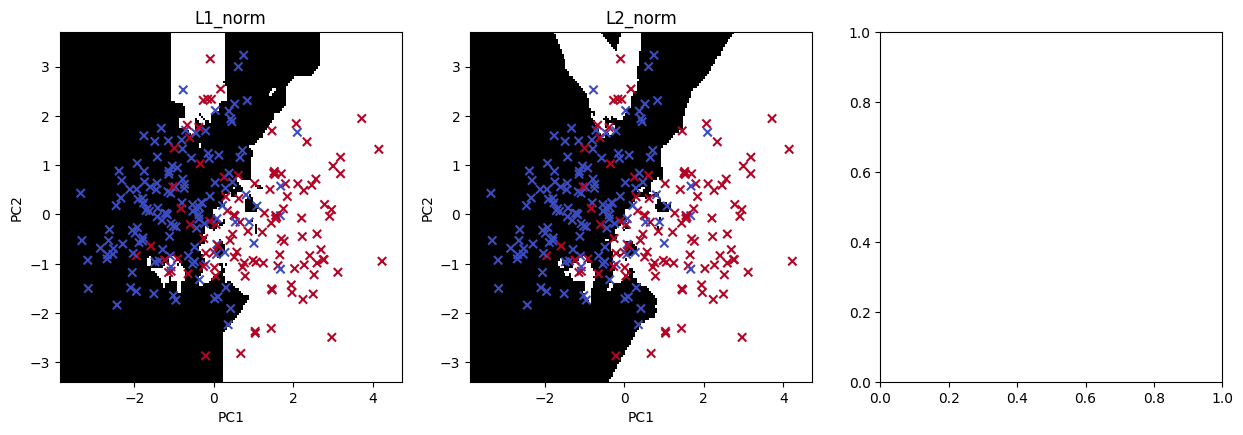

In [20]:
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plot_knn_decision(X_train, y_train, 5, metric)
plt.tight_layout()
plt.show()

## Evaluation metrics
From now on, we will only use the L2 norm

In [21]:
y_pred = knn(X_train, y_train, X_test, 5, L2_norm)

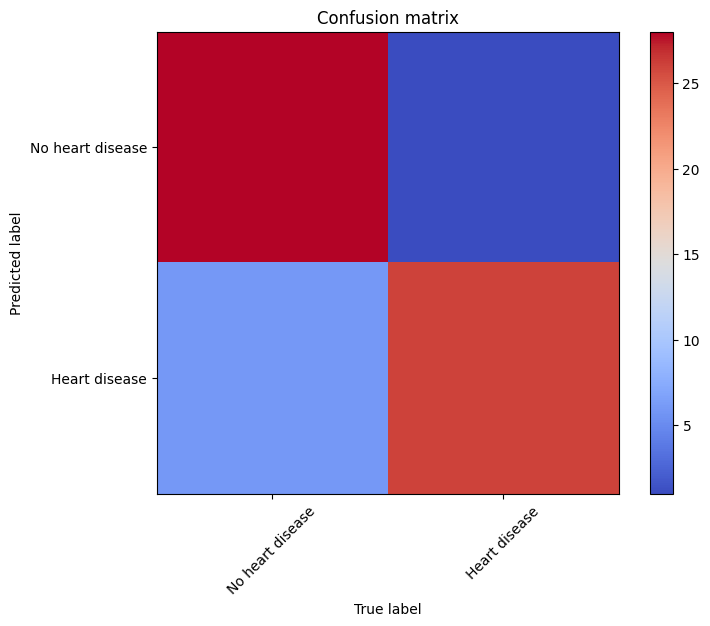

In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='coolwarm')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No heart disease', 'Heart disease'], rotation=45)
plt.yticks(tick_marks, ['No heart disease', 'Heart disease'])
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

# Precision
$precision = \frac{TP}{TP + FP}$

In [24]:
def precision(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    return cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Recall
$recall = \frac{TP}{TP + FN}$

In [25]:
def recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    return cm[1, 1] / (cm[1, 1] + cm[1, 0])

# F1 score
$f1 = 2 * \frac{precision * recall}{precision + recall}$

In [26]:
def f1_score(y_test, y_pred):
    return 2 * precision(y_test, y_pred) * recall(y_test, y_pred) / (precision(y_test, y_pred) + recall(y_test, y_pred))

In [27]:
# Compute the metrics
print('Accuracy:', accuracy(y_test, y_pred))
print('Precision:', precision(y_test, y_pred))
print('Recall:', recall(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.8852459016393442
Precision: 0.9629629629629629
Recall: 0.8125
F1 score: 0.8813559322033898


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.8852459016393442
Precision: 0.9629629629629629
Recall: 0.8125
F1 score: 0.8813559322033898


## How to find a good value for k?

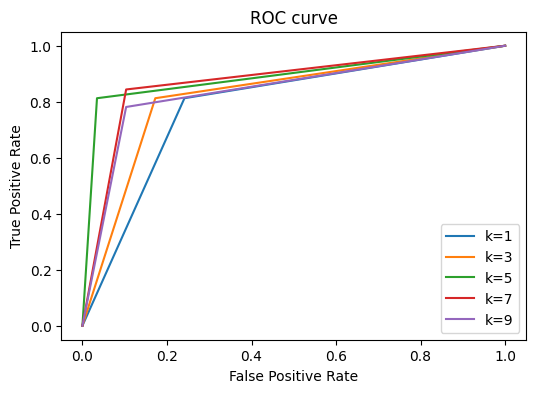

In [29]:
# ROC curve
from sklearn.metrics import roc_curve

# ROC curve for different values of k
plt.figure(figsize=(6, 4))
for k in [1, 3, 5, 7, 9]:
    y_pred = knn(X_train, y_train, X_test, k, L2_norm)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='k={}'.format(k))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [ ]:
# Calcuate the AUC score
from sklearn.metrics import roc_auc_score

for k in [1, 3, 5, 7, 9]:
    y_pred = knn(X_train, y_train, X_test, k, L2_norm)
    print('k={}, AUC={}'.format(k, roc_auc_score(y_test, y_pred)))

# Audio Signal processing (Fourier transform, STFT) and Data Augmentation

In [ ]:
cat_path = "cats_dogs/cat_1.wav"
dog_path = "cats_dogs/dog_barking_1.wav"

In [ ]:
# !pip install librosa

In [ ]:
import librosa

In [ ]:
cat_wav, sr = librosa.load(cat_path)
dog_wav, sr = librosa.load(dog_path)

In [ ]:
# plot data
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(cat_wav)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Cat')
plt.subplot(1, 2, 2)
plt.plot(dog_wav)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Dog')
plt.show()

### Fourier transform

In [ ]:
def plot_fourier_transform(wav, sr):
    n = len(wav)
    T = 1 / sr
    yf = np.fft.fft(wav)
    xf = np.linspace(0.0, 1.0 / (2.0 * T), n // 2)
    plt.plot(xf, 2.0 / n * np.abs(yf[:n // 2]))
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')

In [ ]:
# plot FT of cat and dog
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_fourier_transform(cat_wav, sr)
plt.title('Cat')

plt.subplot(1, 2, 2)
plot_fourier_transform(dog_wav, sr)
plt.title('Dog')
plt.show()


### STFT

In [ ]:
def plot_stft(stft, title):
    librosa.display.specshow(librosa.amplitude_to_db(stft), sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()  
    plt.title(title)

In [ ]:
cat_stft = librosa.stft(cat_wav)
dog_stft = librosa.stft(dog_wav)

# Calculate the magnitude of the STFT
cat_stft = np.abs(cat_stft)
dog_stft = np.abs(dog_stft)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_stft(cat_stft, 'Cat')

plt.subplot(1, 2, 2)
plot_stft(dog_stft, 'Dog')
plt.show()


### Audio data augmentation

In [ ]:
# !pip install albumentations

In [ ]:
import albumentations as A
from albumentations.core.transforms_interface import DualTransform, BasicTransform

### Pitch shift

In [ ]:
class AudioTransform(BasicTransform):
    """Transform for Audio task"""

    @property
    def targets(self):
        return {"data": self.apply}

    def update_params(self, params, **kwargs):
        if hasattr(self, "interpolation"):
            params["interpolation"] = self.interpolation
        if hasattr(self, "fill_value"):
            params["fill_value"] = self.fill_value
        return params
    
class PitchShift(AudioTransform):
    """Shifting time axis"""
    def __init__(self, always_apply=False, p=0.5):
        super(PitchShift, self).__init__(always_apply, p)
    
    def apply(self, data, **params):
        sound, sr = data

        n_steps = np.random.randint(-10, 10)
        augmented_sound = librosa.effects.
        pitch_shift(y=sound, sr=sr, n_steps=n_steps)

        return augmented_sound, sr

In [ ]:
# Apply pitch shift
transform = PitchShift(always_apply=True, p=1)
cat_wav_pitch_shift, sr = transform(data=(cat_wav, sr))['data']

In [ ]:
# plot wav files in one plot
plt.plot(cat_wav, label='Cat')
plt.plot(cat_wav_pitch_shift, label='Cat pitch shift')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
# Look at the STFT
cat_stft_pitch_shift = librosa.stft(cat_wav_pitch_shift)
cat_stft_pitch_shift = np.abs(cat_stft_pitch_shift)

plot_stft(cat_stft_pitch_shift, 'Cat pitch shift')